Nama Kelompok:
1. Alif Wira Bayu (221910814)
2. Denisa Hilmy Atiqah (221911050)
3. Dwi Joko Purnomo (221910685)
4. Latifa Rahmadani Jamal (221911099)
5. Riofebri Prasetia (221911192)

Data yang digunakan adalah adult.data

deskripsi:
Ekstraksi dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Tugas prediksi adalah menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

**Import library yang diperlukan. Kemudian import data adult.data
data yang digunakan ialah adult.**
data dimana data ini menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

In [59]:
from sklearn import neighbors, datasets, model_selection, metrics
import pandas as pd

# reading csv files
data =  pd.read_csv('Test.csv')


In [60]:
data.head(5)

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869


In [64]:
data

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,19515,94,9471,1,39,0,1,1,1,1.757,3.262,48.936,209.045
5902,19525,94,9471,0,30,1,1,1,1,1.757,3.262,48.936,209.045
5903,19528,94,9471,0,22,1,1,1,1,1.757,3.262,48.936,209.045
5904,19531,94,9471,0,40,1,1,1,1,1.757,3.262,48.936,209.045


**Lihat tabel dan struktur dataset nya terlebih dahulu.**

In [61]:
# get some rows informations
print(data)

# describe the data
data.describe()

         ID  Provinsi  KodeKabKot  X1  X2  X3  X4  X5  X6     Z1      Z2  \
0         3        11        1101   1  39   0   0   1   1  1.077  15.075   
1         5        11        1101   0  32   1   0   1   1  1.077  15.075   
2         6        11        1101   1  32   1   0   1   1  1.077  15.075   
3        10        11        1101   1  28   1   0   1   0  1.077  15.075   
4        17        11        1101   0  31   1   0   1   1  1.077  15.075   
...     ...       ...         ...  ..  ..  ..  ..  ..  ..    ...     ...   
5901  19515        94        9471   1  39   0   1   1   1  1.757   3.262   
5902  19525        94        9471   0  30   1   1   1   1  1.757   3.262   
5903  19528        94        9471   0  22   1   1   1   1  1.757   3.262   
5904  19531        94        9471   0  40   1   1   1   1  1.757   3.262   
5905  19532        94        9471   0  38   1   0   1   1  1.757   3.262   

          Z3       Z4  
0     26.919  390.869  
1     26.919  390.869  
2     26.919  3

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
count,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5901.000000
mean,9774.071114,44.540298,4474.883678,0.599221,30.622079,0.497630,0.418049,0.827972,0.872164,1.206896,6.791408,35.871193,195.885574
std,5602.401244,26.055399,2602.043360,0.490098,6.552239,0.500037,0.493280,0.377437,0.333935,1.014191,5.602126,34.409927,130.892617
min,3.000000,11.000000,1101.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369000,0.861000,20.183000
25%,4927.250000,18.000000,1805.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,0.550000,3.136000,16.744000,104.301000
50%,9734.500000,35.000000,3522.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,0.883000,4.925500,25.318000,159.925000
75%,14639.000000,71.000000,7111.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.473000,8.134000,39.434000,257.738000
max,19532.000000,94.000000,9471.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,6.960000,35.237000,291.322000,1400.875000


In [62]:
data.head(5)

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869


**cek skala atau type atribut**

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5906 non-null   int64  
 1   Provinsi    5906 non-null   int64  
 2   KodeKabKot  5906 non-null   int64  
 3   X1          5906 non-null   int64  
 4   X2          5906 non-null   int64  
 5   X3          5906 non-null   int64  
 6   X4          5906 non-null   int64  
 7   X5          5906 non-null   int64  
 8   X6          5906 non-null   int64  
 9   Z1          5906 non-null   float64
 10  Z2          5906 non-null   float64
 11  Z3          5906 non-null   float64
 12  Z4          5901 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 600.0 KB


**Cek Apakah masih ada data yang mengandung null**
dalam dataset ini data yang mengandung null adalah atribut atau baris yang bernilai '?'

In [34]:
# data['workclass'].value_counts()
for x in data.columns :
  print((data[x] == '?').value_counts())
  print()

False    5906
Name: ID, dtype: int64

False    5906
Name: Provinsi, dtype: int64

False    5906
Name: KodeKabKot, dtype: int64

False    5906
Name: X1, dtype: int64

False    5906
Name: X2, dtype: int64

False    5906
Name: X3, dtype: int64

False    5906
Name: X4, dtype: int64

False    5906
Name: X5, dtype: int64

False    5906
Name: X6, dtype: int64

False    5906
Name: Z1, dtype: int64

False    5906
Name: Z2, dtype: int64

False    5906
Name: Z3, dtype: int64

False    5906
Name: Z4, dtype: int64



**Drop baris pada tabel yang mengandung null**

In [35]:
data = data.fillna(data.mean())

In [36]:
#data =data.drop(columns=['ID'])
#data =data.drop(columns=['Provinsi'])
data =data.drop(columns=['KodeKabKot'])

**Lihat tabel dan struktur nya**

In [37]:
# get some rows informations
print(data)

# describe the data
data.describe()

         ID  Provinsi  X1  X2  X3  X4  X5  X6     Z1      Z2      Z3       Z4
0         3        11   1  39   0   0   1   1  1.077  15.075  26.919  390.869
1         5        11   0  32   1   0   1   1  1.077  15.075  26.919  390.869
2         6        11   1  32   1   0   1   1  1.077  15.075  26.919  390.869
3        10        11   1  28   1   0   1   0  1.077  15.075  26.919  390.869
4        17        11   0  31   1   0   1   1  1.077  15.075  26.919  390.869
...     ...       ...  ..  ..  ..  ..  ..  ..    ...     ...     ...      ...
5901  19515        94   1  39   0   1   1   1  1.757   3.262  48.936  209.045
5902  19525        94   0  30   1   1   1   1  1.757   3.262  48.936  209.045
5903  19528        94   0  22   1   1   1   1  1.757   3.262  48.936  209.045
5904  19531        94   0  40   1   1   1   1  1.757   3.262  48.936  209.045
5905  19532        94   0  38   1   0   1   1  1.757   3.262  48.936  209.045

[5906 rows x 12 columns]


,ID,Provinsi,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
count,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000
mean,9774.071114,44.540298,0.599221,30.622079,0.497630,0.418049,0.827972,0.872164,1.206896,6.791408,35.871193,195.885574
std,5602.401244,26.055399,0.490098,6.552239,0.500037,0.493280,0.377437,0.333935,1.014191,5.602126,34.409927,130.837189
min,3.000000,11.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369000,0.861000,20.183000
25%,4927.250000,18.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,0.550000,3.136000,16.744000,104.361750
50%,9734.500000,35.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,0.883000,4.925500,25.318000,159.925000
75%,14639.000000,71.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.473000,8.134000,39.434000,257.738000
max,19532.000000,94.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,6.960000,35.237000,291.322000,1400.875000


**Cek type data**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5906 non-null   int64  
 1   Provinsi  5906 non-null   int64  
 2   X1        5906 non-null   int64  
 3   X2        5906 non-null   int64  
 4   X3        5906 non-null   int64  
 5   X4        5906 non-null   int64  
 6   X5        5906 non-null   int64  
 7   X6        5906 non-null   int64  
 8   Z1        5906 non-null   float64
 9   Z2        5906 non-null   float64
 10  Z3        5906 non-null   float64
 11  Z4        5906 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 553.8 KB


**Lihat tabel 10 baris pertama**

In [39]:
data.head(10)

,ID,Provinsi,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,0,31,1,0,1,1,1.077,15.075,26.919,390.869
5,19,11,1,24,0,0,1,1,1.077,15.075,26.919,390.869
6,20,11,1,27,1,0,1,1,1.077,15.075,26.919,390.869
7,32,11,1,25,1,0,1,1,1.077,15.075,26.919,390.869
8,42,11,1,34,0,1,1,1,0.790,9.485,34.780,271.125
9,44,11,0,20,0,0,0,1,0.790,9.485,34.780,271.125


**Import library preprocessing**
untuk melakukan preprocessing data. mengkodekan variabel/atribut kategorik ke numerik

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data.columns:
  data[x] = le.fit_transform(data[x])

data.head(10)

,ID,Provinsi,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0,0,1,24,0,0,1,1,248,458,257,472
1,1,0,0,17,1,0,1,1,248,458,257,472
2,2,0,1,17,1,0,1,1,248,458,257,472
3,3,0,1,13,1,0,1,0,248,458,257,472
4,4,0,0,16,1,0,1,1,248,458,257,472
5,5,0,1,9,0,0,1,1,248,458,257,472
6,6,0,1,12,1,0,1,1,248,458,257,472
7,7,0,1,10,1,0,1,1,248,458,257,472
8,8,0,1,19,0,1,1,1,180,392,328,389
9,9,0,0,5,0,0,0,1,180,392,328,389


**melakukan standarisasi data**
melakukan standarisasi data ke dalam bentuk standar normal

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = pd.DataFrame(scaler.fit_transform(data))

std_data.columns = data.columns
std_data

,ID,Provinsi,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,-1.731758,-1.529574,0.817822,1.278743,-0.995270,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.544352
1,-1.731171,-1.529574,-1.222760,0.210316,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.544352
2,-1.730584,-1.529574,0.817822,0.210316,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.544352
3,-1.729998,-1.529574,0.817822,-0.400215,1.004752,-0.847561,0.455819,-2.611995,0.315921,1.504190,0.064364,1.544352
4,-1.729411,-1.529574,-1.222760,0.057683,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.544352
...,...,...,...,...,...,...,...,...,...,...,...,...
5901,1.729411,1.784316,0.817822,1.278743,-0.995270,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.402668
5902,1.729998,1.784316,-1.222760,-0.094950,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.402668
5903,1.730584,1.784316,-1.222760,-1.316010,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.402668
5904,1.731171,1.784316,-1.222760,1.431376,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.402668


**Drop atribut**
melakukan drop atribut education karena sudah terwkili dengan atribut education num

In [14]:
#std_data = std_data.drop(columns=['education'])

**Lihat tabel setelah standarisasi**

In [15]:
##std_data

**import library seaborn**
cek apakah inbalance atau tidak

In [42]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=data['Y'],data=data,palette='RdBu_r')

KeyError: 'Y'

**Mengembalikan label salary ke dalam bentuk kategorik dalam angka**

In [17]:
std_data['Y'] = le.fit_transform(std_data['Y'])
std_data

,ID,Provinsi,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,-1.731924,-1.512035,0,0.798340,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522371
1,-1.731669,-1.512035,0,0.798340,1.198666,-0.975925,-0.819571,0.478778,-2.656681,0.301923,1.488305,0.059337,1.522371
2,-1.731415,-1.512035,0,-1.252599,0.884046,-0.975925,-0.819571,-2.088649,0.376410,0.301923,1.488305,0.059337,1.522371
3,-1.731161,-1.512035,0,-1.252599,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522371
4,-1.730907,-1.512035,0,0.798340,0.884046,1.024669,-0.819571,-2.088649,-2.656681,0.301923,1.488305,0.059337,1.522371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,1.730907,1.765075,1,-1.252599,-0.374434,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.396861
13622,1.731161,1.765075,0,0.798340,-1.318293,1.024669,1.220150,0.478778,0.376410,1.046703,-0.850424,1.098507,0.396861
13623,1.731415,1.765075,0,-1.252599,0.726736,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.396861
13624,1.731669,1.765075,0,-1.252599,-0.531744,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.396861


**Buat Model K-Neirest Neighbor**

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(std_data.drop(columns=['Y']), std_data[['Y']], test_size=0.2, random_state=69)

model = neighbors.KNeighborsClassifier(n_neighbors=3)

print(X_train)
print(y_train)

model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(predicted)

# print(metrics.confusion_matrix(y_test, predicted))
# print(metrics.accuracy_score(y_test, predicted))

             ID  Provinsi        X1        X2        X3        X4        X5  \
12998  1.572523  1.665769  0.798340 -1.318293  1.024669  1.220150 -2.088649   
6007  -0.204780 -0.320359  0.798340  0.569426  1.024669 -0.819571  0.478778   
8379   0.398247  0.275479 -1.252599  1.041356 -0.975925 -0.819571  0.478778   
8958   0.545445  0.374786 -1.252599  0.097496  1.024669 -0.819571  0.478778   
13222  1.629470  1.765075 -1.252599  0.569426  1.024669 -0.819571 -2.088649   
...         ...       ...       ...       ...       ...       ...       ...   
8631   0.462312  0.275479 -1.252599  0.412116  1.024669  1.220150  0.478778   
9818   0.764080  0.672705 -1.252599  0.726736  1.024669  1.220150  0.478778   
10859  1.028731  1.069930  0.798340 -0.059814  1.024669 -0.819571  0.478778   
4041  -0.704591 -0.618278 -1.252599 -1.632913 -0.975925 -0.819571  0.478778   
7371   0.141986 -0.022440 -1.252599  0.412116 -0.975925 -0.819571  0.478778   

             X6        Z1        Z2        Z3      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Cek konfusion matriks**

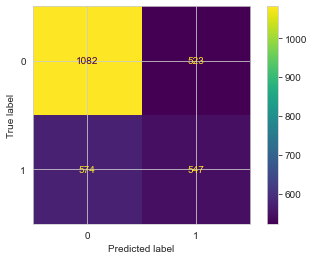

In [19]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [20]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1605
           1       0.51      0.49      0.50      1121

    accuracy                           0.60      2726
   macro avg       0.58      0.58      0.58      2726
weighted avg       0.59      0.60      0.60      2726



**Cek akurasi model**

In [21]:
model.score(X_test, y_test)

0.5975788701393984

**Lakukan Cross Validation**
sebelum itu lakukan import library cross_val_score

In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.60183486 0.61376147 0.62293578 0.59908257 0.60137615]
cv_scores mean:0.6077981651376148


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Cek korelasi antar atribut**

In [23]:
print(std_data.drop(columns=['Y']).corr)

<bound method DataFrame.corr of              ID  Provinsi        X1        X2        X3        X4        X5  \
0     -1.731924 -1.512035  0.798340 -0.531744 -0.975925 -0.819571  0.478778   
1     -1.731669 -1.512035  0.798340  1.198666 -0.975925 -0.819571  0.478778   
2     -1.731415 -1.512035 -1.252599  0.884046 -0.975925 -0.819571 -2.088649   
3     -1.731161 -1.512035 -1.252599 -0.531744 -0.975925 -0.819571  0.478778   
4     -1.730907 -1.512035  0.798340  0.884046  1.024669 -0.819571 -2.088649   
...         ...       ...       ...       ...       ...       ...       ...   
13621  1.730907  1.765075 -1.252599 -0.374434  1.024669 -0.819571  0.478778   
13622  1.731161  1.765075  0.798340 -1.318293  1.024669  1.220150  0.478778   
13623  1.731415  1.765075 -1.252599  0.726736  1.024669 -0.819571  0.478778   
13624  1.731669  1.765075 -1.252599 -0.531744  1.024669 -0.819571  0.478778   
13625  1.731924  1.765075 -1.252599  1.355976  1.024669  1.220150  0.478778   

             X6    

**Lihat model Korelasi antar atribut**

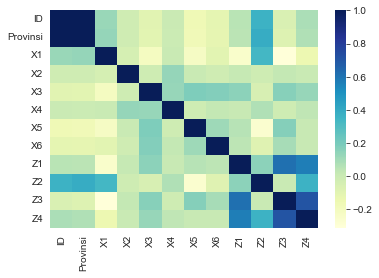

In [24]:
# plotting correlation heatmap
dataplot = sns.heatmap(std_data.drop(columns=['Y']).corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

**Lakukan GridSearchCV untuk menemukan parameter terbaik**
Dimana tujuan itu untuk mencari nilai k, menentukan metode kemiripan yang tepat, dan menggunkan bobot uniform atau distance dengan cross validation 10

In [25]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters to tune
n_neighbors = list(range(1,10))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(model, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best p: 1
Best n_neighbors: 8
Best weights: uniform
0.6221570066030815


**Cek Akurasi model yang direkomendasikan dari parameter yang telah ditentukan**

In [26]:
best_model.score(X_test, y_test)

0.6221570066030815

**Cek Konfusion Matrix**

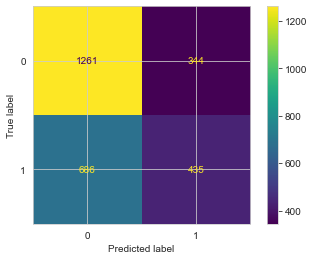

In [27]:
predicted3 = best_model.predict(X_test)

cm = confusion_matrix(y_test, predicted3, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

In [65]:
hasil = best_model.predict(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- KodeKabKot
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Dalam hal ini ketika ditentukan model dengan parameter terbaik dapat meningkatkan akurasi model dari yang awalnya sebesar 82,4% menjadi 84,2%.

In [66]:
df = pd.DataFrame(hasil, columns = ['Y'])

In [67]:
df = pd.concat([data["ID"], df], axis=1)

In [69]:
df.to_csv("hasil.csv",index=False)

In [68]:
df

,ID,Y
0,3,1
1,5,1
2,6,1
3,10,1
4,17,1
...,...,...
5901,19515,0
5902,19525,0
5903,19528,0
5904,19531,0


In [58]:
data

,ID,Provinsi,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0,0,1,24,0,0,1,1,248,458,257,472
1,1,0,0,17,1,0,1,1,248,458,257,472
2,2,0,1,17,1,0,1,1,248,458,257,472
3,3,0,1,13,1,0,1,0,248,458,257,472
4,4,0,0,16,1,0,1,1,248,458,257,472
...,...,...,...,...,...,...,...,...,...,...,...,...
5901,5901,33,1,24,0,1,1,1,342,113,408,305
5902,5902,33,0,15,1,1,1,1,342,113,408,305
5903,5903,33,0,7,1,1,1,1,342,113,408,305
5904,5904,33,0,25,1,1,1,1,342,113,408,305
